In [ ]:
#The main is to develop a machine learning model using linear regression to accurately predict the box office revenue of the movies based on various availability
#The model will be trained on dataset

#Specific objectives
#1. Build a predictive model that can estimate the estimate the expected revenue of the movie
#2. Provide insight into which features most influence the box office success
#3. Compare linear regression performances with more advanced models

#1. STEP 1
#Import libraries
#2. STEP 2
#Preprocessing and modelling
#a)train_test_split
#b)LabelEncoder
#c)Standardscaler: Scales features for better model performance
#d)CountVectorizer: Converts text data into numeric vectors
#d)Metrics: Offers tools for evaluating model accuracy

#Advanced modelling
#xgboost - A high performance gradient boosting algorithms used for better prediction

#Utility
#Warning filterwarnings("ignore"):

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/150.0 MB 817.9 kB/s eta 0:03:03
   ---------------------------------------- 0.8/150.0 MB 817.9 kB/s eta 0:03:03
   ---------------------------------------- 1.3/150.0 MB 828.3 kB/s eta 0:03:00
   ---------------------------------------- 1.3/150.0 MB 828.3 kB/s eta 0:03:00
   ---------------------------------------- 1.6/150.0 MB 806.6 kB/s eta 0:03:04
   ---------------------------------------- 1.8/150.0 MB 838.9 kB/s eta 0:02:57
   -----------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor # type: ignore

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('boxoffice.csv')
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170
2693,Interstellar,158336835,77904664,Universal,132903825,3914,93959844,PG-13,Comedy,170


In [4]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [7]:
#Checking the dataset size
row, column = df.shape
print(f"Number of rows {row}")
print(f"Number of columns {column}")


Number of rows 2694
Number of columns 10


In [9]:
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [10]:
#Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [11]:
#Droppimg columns
df.drop(columns=['world_revenue','opening_revenue'],axis = 1,inplace =True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,76732721.25,152572473.5,2.247314e+08,299810741.0
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1161.00,2271.5,3.392250e+03,4499.0
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,78618761.50,156256716.0,2.274832e+08,299859703.0
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,47.00,91.0,1.350000e+02,179.0


In [13]:
#% of values which are missing in each column
df.isnull().sum()*100 / df.shape[0]


title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [14]:
df.isnull().sum()

title               0
domestic_revenue    0
distributor         0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

In [15]:
display(df.to_string())

'                         title  domestic_revenue   distributor  opening_theaters     budget   MPAA     genres  release_days\n0                 The Avengers           6026491  Warner Bros.               253  174687337      R  Animation            16\n1                      Titanic         169411543        Disney               122  103948486      G     Action           103\n2                Jurassic Park         107836098          Sony              3826  122104991  NC-17     Horror            89\n3                       Avatar          51433697        Disney              3868   46431596      G     Horror            85\n4                The Lion King         142791649  Warner Bros.              2934  203513696      R     Comedy           158\n5                    Star Wars         283757629     Universal              1216   39257068      R     Comedy           154\n6                       Frozen          37740374          Sony              4472   81033758  NC-17     Action            47\

In [12]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 
    
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 

    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df.head(100)

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,26491,Warner Bros.,253,174687337,R,Animation,16
1,Titanic,69411543,Disney,122,103948486,G,Action,103
2,Jurassic Park,7836098,Sony,3826,122104991,NC-17,Horror,89
3,Avatar,1433697,Disney,3868,46431596,G,Horror,85
4,The Lion King,42791649,Warner Bros.,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...
95,Jurassic Park,51538541,Warner Bros.,2774,53683854,R,Drama,100
96,Avatar,23828477,Sony,4166,294056742,NC-17,Horror,48
97,The Lion King,14776212,Paramount,2212,134219315,R,Thriller,88
98,Star Wars,29275123,Disney,3531,205898288,PG-13,Comedy,138


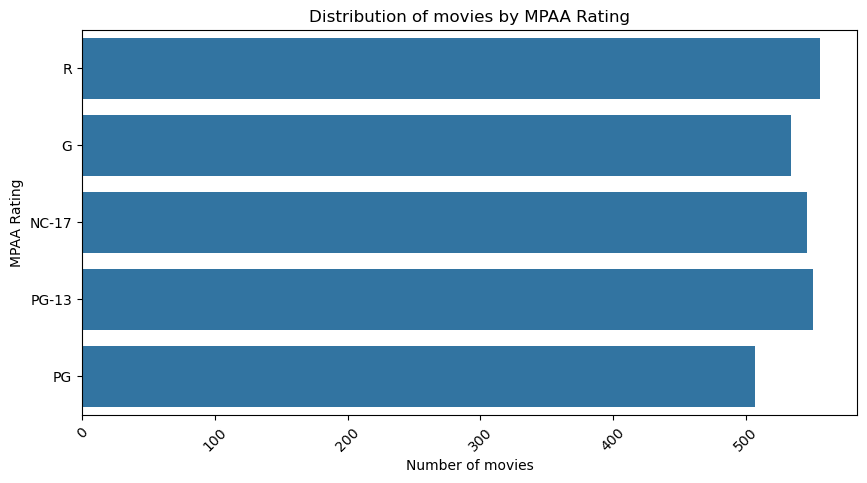

In [5]:
#Visualising MPAA 
plt.figure(figsize=(10,5))
sb.countplot(df['MPAA'])
plt.title('Distribution of movies by MPAA Rating')
plt.xlabel('Number of movies')
plt.ylabel('MPAA Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Average Domestic Revenue for each MPAA rating category
df.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        1.465288e+08
NC-17    1.507193e+08
PG       1.529123e+08
PG-13    1.477556e+08
R        1.563334e+08
Name: domestic_revenue, dtype: float64

Text(0, 0.5, 'Revenue ($Millions)')

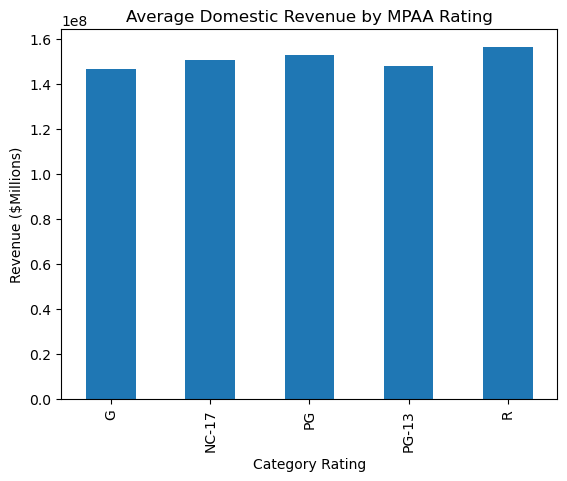

In [9]:
#Bar graph showing the avearge domestic revenue of each MPAA rating category
df.groupby('MPAA')['domestic_revenue'].mean().plot(kind='bar')
plt.title('Average Domestic Revenue by MPAA Rating')
plt.xlabel('Category Rating')
plt.ylabel('Revenue ($Millions)')


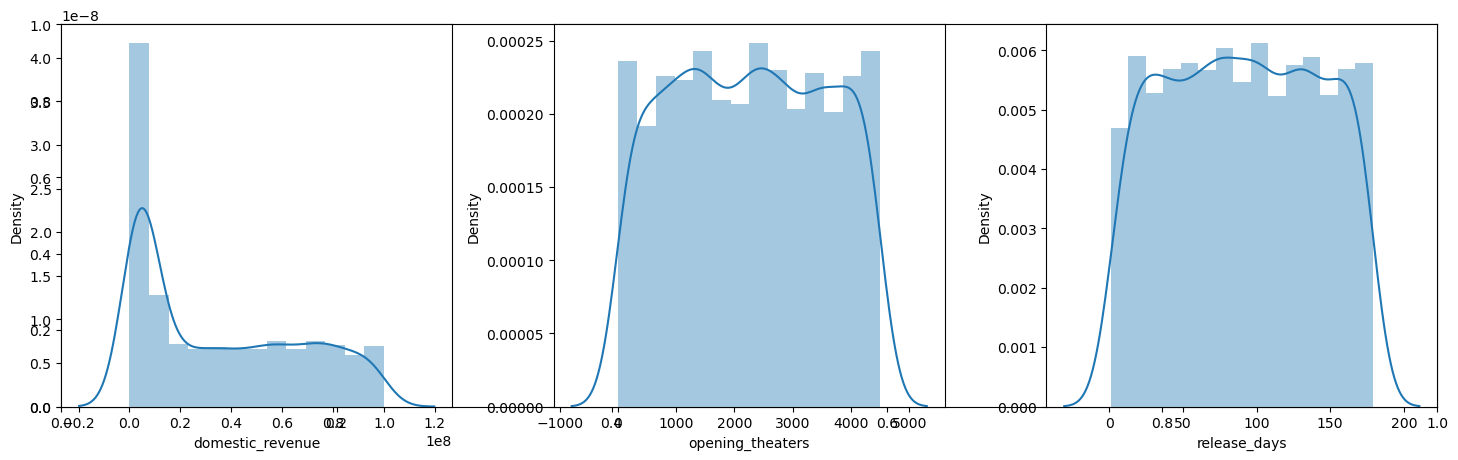

In [13]:
plt.subplots(figsize=(15,5))
features = ['domestic_revenue','opening_theaters','release_days']
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()    

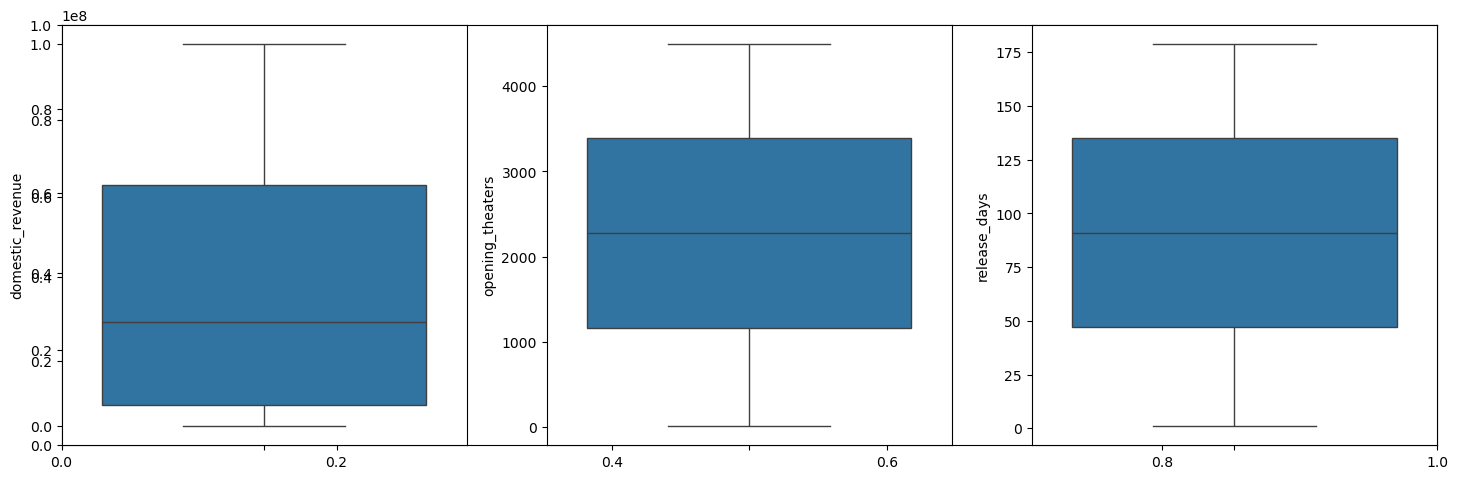

In [ ]:
#"Distribution Analysis of Key Movie Metrics"
plt.subplots(figsize=(15,5))
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    sb.boxplot(df[col])
plt.tight_layout()    
plt.show()    
    

In [16]:
#Computing base-10 logarithm of each value 'x' in the column 
for col in features:
    df[col] = df[col].apply(lambda x: np.log10(x))

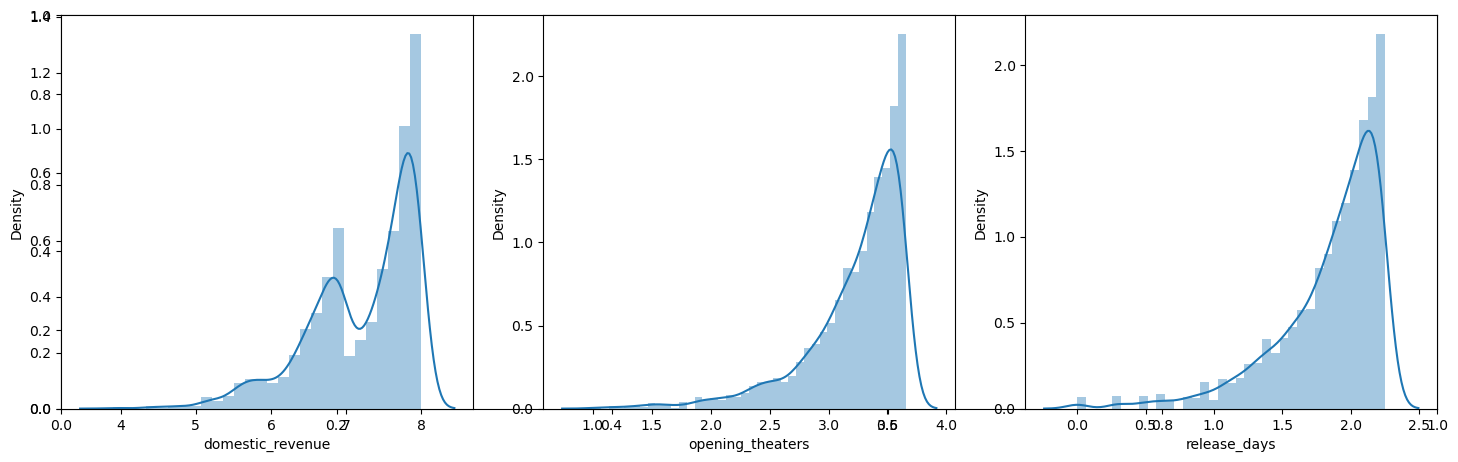

In [17]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(features):
    plt.subplot(1,3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()    


In [18]:
#Text vectorization on the genres col
vectorizer = CountVectorizer()
vectorizer.fit(df['genres'])
features = vectorizer.transform(df['genres']).toarray()

genres = vectorizer.get_feature_names_out()
for i, name in enumerate(genres):
    df[name] = features[:,i]
    
df.drop('genres',axis=1,inplace=True)    

In [19]:
removed = 0
#Check for 'action' and 'western' columns exist before slicing
if 'action' in df.columns and 'western' in df.columns:
    for col in df.loc[:, 'action':'western'].columns:
        
        #removing columns ahving more
        #than 95% of the values as zero.
        if (df[col]==0).mean()>0.95:
            removed += 1
            df.drop(col,axis=1,inplace=True)
print(removed) 
print(df.shape)           
    

0
(2694, 15)


In [20]:
#Label encoding
for col in ['distributor','MPAA']:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])

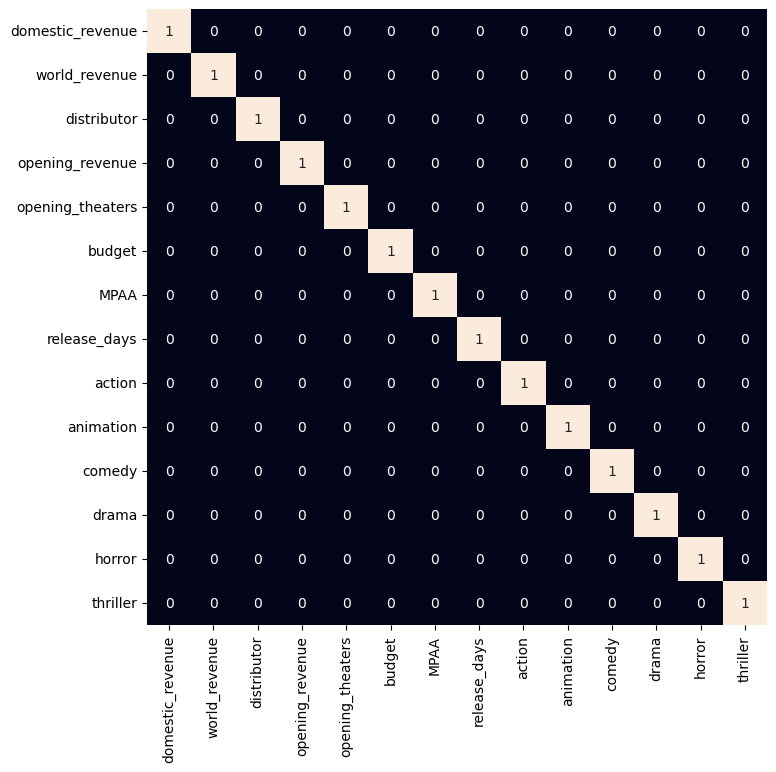

In [21]:
plt.figure(figsize=(8,8))
sb.heatmap(df.select_dtypes(include=np.number).corr()>0.8,annot=True,cbar=False)
plt.show()


In [22]:
#Perparing the dataset for machine learning
features = df.drop(['title','domestic_revenue'],axis=1)
target = df['domestic_revenue'].values


X_train, X_val, Y_train, Y_val = train_test_split(features,target,test_size=0.1,random_state=22)
X_train.shape, X_val.shape

((2424, 13), (270, 13))

In [23]:
#Normalising the features for stable and fast training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [24]:
from sklearn.metrics import mean_absolute_error as mae 
model = XGBRegressor()
model.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#The jump to 0.595 suggests the model isn't generalizing well
#model has likely memorized patterns in the training data that don't generalize
#It's too complex for your dataset size, learning noise rather than true patterns SOLN->Reduce overfitting
train_preds = model.predict(X_train)
print('Training Error: ',mae(Y_train,train_preds))
print()
val_preds = model.predict(X_val)
print('Validation Error: ',mae(Y_val,val_preds))


Training Error:  0.1334050652654731

Validation Error:  0.5950876254526021
